In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [2]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# making easier to interpret , making new dataframe with userId as col and movieId as rows
final_data = ratings.pivot(index='movieId', columns='userId', values='rating')
final_data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# making nan values =0
final_data.fillna(0, inplace=True)
final_data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


 Removing noise : removing movies rated by less no. of users and users who rated less movies
 To qualify a movie, a minimum of 10 users should have voted a movie.
 To qualify a user, a minimum of 50 movies should have voted by the user.

In [9]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')  
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')  

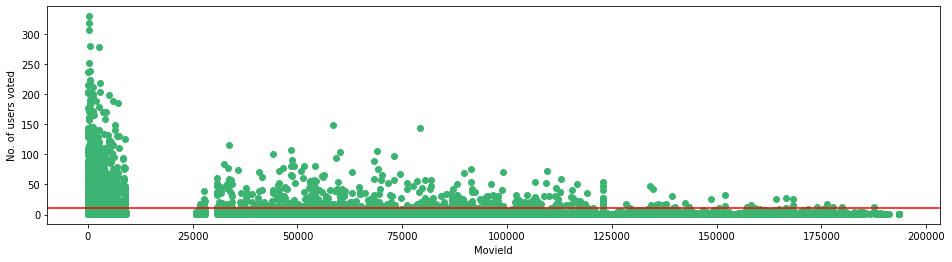

In [12]:
f, ax = plt.subplots(1, 1, figsize=(16, 4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [16]:
final_data = final_data.loc[no_user_voted[no_user_voted > 10].index, :]

To visualize the number of votes by each user with our threshold of 50.

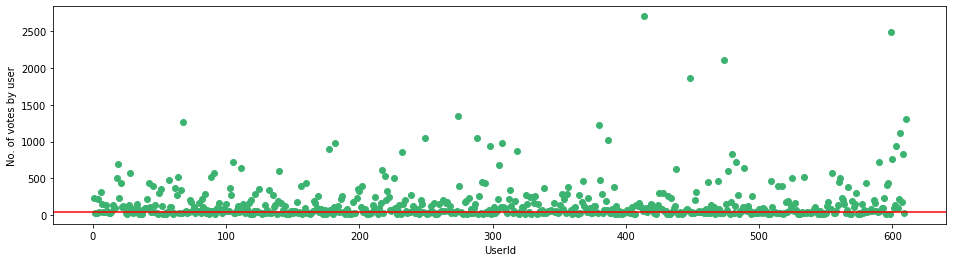

In [17]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [18]:
final_data = final_data.loc[:, no_movies_voted[no_movies_voted > 50].index]
final_data

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To reduce Sparsity csr_matrix fun is used

In [19]:
# Applying the csr_matrix method to the dataset :
csr_data = csr_matrix(final_data.values)
final_data.reset_index(inplace=True)

In [21]:
nn = NearestNeighbors(metric = 'cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
nn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

Making Recommendation system fun:

In [42]:
def movie_rec(movie_name):
    # number to movies to recommend
    n_to_rec = 10

    # list of movies with name given as: movie_name
    movie_list = movies[movies['title'].str.contains(movie_name)]
    
    if len(movie_list):
        # Extracting id of that movies
        movie_id = movie_list.iloc[0]['movieId']
        movie_id = final_data[final_data['movieId'] == movie_id].index[0]  # it append only those movies which are resent in dataset

        # taking distance and movieId of that movie
        distance, indice = nn.kneighbors(csr_data[movie_id], n_neighbors=n_to_rec + 1)

        # sorted list of distance and indices 
        rec_movie_indice = sorted(list(zip(indice.squeeze().tolist(), distance.squeeze().tolist())), key = lambda x: x[1])[:0:-1]
        print(sorted(list(zip(indice.squeeze().tolist(), distance.squeeze().tolist())), key = lambda x: x[1]))
        
        rec_frame = []  # store recommended movies
        
        for val in rec_movie_indice:
            movie_id = final_data.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_id].index
            rec_frame.append({'Title':movies.iloc[idx]['title'].values[0], 'Distance':val[1]})
        
        df = pd.DataFrame(rec_frame, index=range(1, n_to_rec+1))
        return df
        
    else:
        return "No movies found "    

 

In [43]:
movie_rec('Toy Story')

[(0, 0.0), (217, 0.33488418488394356), (169, 0.3565415477121445), (1048, 0.37163656407393986), (124, 0.3807886031957386), (1292, 0.3814720344599547), (67, 0.38463266223098214), (454, 0.39066271577950284), (141, 0.3982930777974919), (173, 0.3985780912457598), (500, 0.39949482401724834)]


,Title,Distance
1,Groundhog Day (1993),0.399495
2,"Lion King, The (1994)",0.398578
3,Pulp Fiction (1994),0.398293
4,Star Wars: Episode VI - Return of the Jedi (1983),0.390663
5,Apollo 13 (1995),0.384633
6,Shrek (2001),0.381472
7,Star Wars: Episode IV - A New Hope (1977),0.380789
8,Toy Story 2 (1999),0.371637
9,Forrest Gump (1994),0.356542
10,Jurassic Park (1993),0.334884
